In [1]:
import osh5def
import osh5vis
import osh5io


Frame 0
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/dschneidinger/MagShockZ/simulations/raw_data/magshockz-v2.0.2d/MS/DENSITY/Aluminum/charge/charge-Aluminum-000008.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Frame 0


<Figure size 640x480 with 0 Axes>

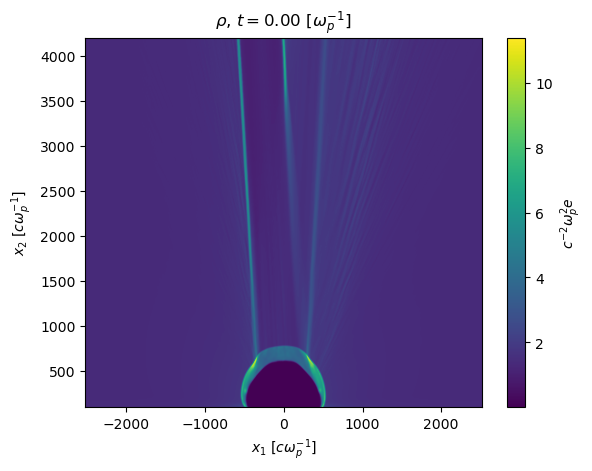

In [5]:
from matplotlib.animation import FuncAnimation
from IPython import display

data_dir = '/home/dschneidinger/MagShockZ/simulations/raw_data/magshockz-v2.0.2d/MS'

import matplotlib.pyplot as plt

# Function to update the plot
fig = plt.figure()

# Function to update the plot
fig, ax = plt.subplots()

def update(frame):
    plt.clf()
    c = osh5io.read_h5(f'{data_dir}/DENSITY/Aluminum/charge/charge-Aluminum-{frame:06d}.h5')
    osh5vis.osplot(c)
        
    print(f'Frame {frame}')

# Create the animation
ani = FuncAnimation(fig, update,frames=7, interval=20)
# Ensure all frames use the same colorbar as the first frame
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
# Ensure ffmpeg is available

# ani.save('charge-Aluminum.mp4', writer='ffmpeg', fps=20)

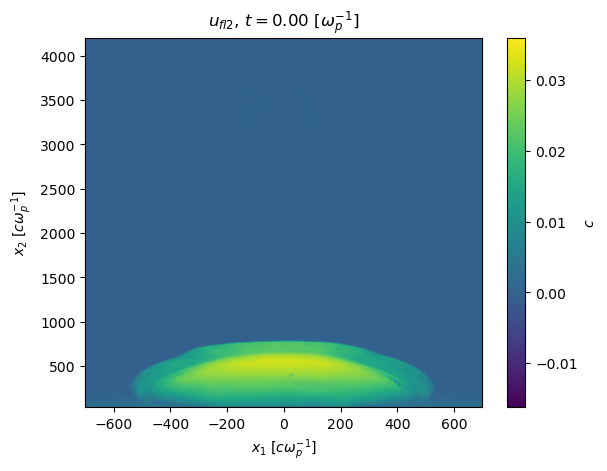

In [40]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/ufl2/ufl2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)


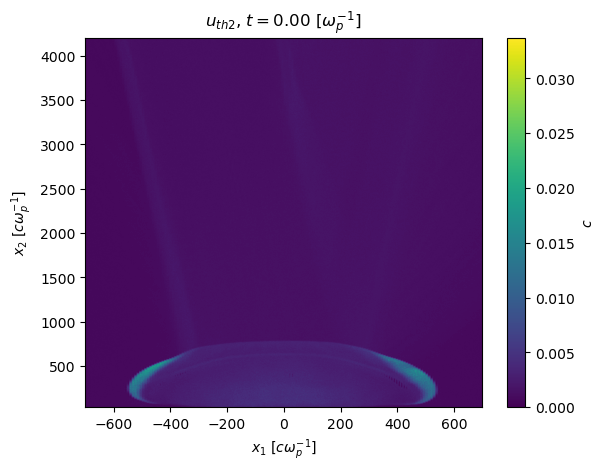

In [43]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/uth2/uth2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)
